In [1]:
import pandas as pd

# Data Preprocessing

In [2]:
df = pd.read_csv("heart_disease_uci.csv")
df = df.drop(['dataset'],axis=1)

In [3]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.shape

(920, 15)

In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


In [7]:
df.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['fbs'] = df['fbs'].fillna(df['fbs'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

In [9]:
df.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<AxesSubplot:>

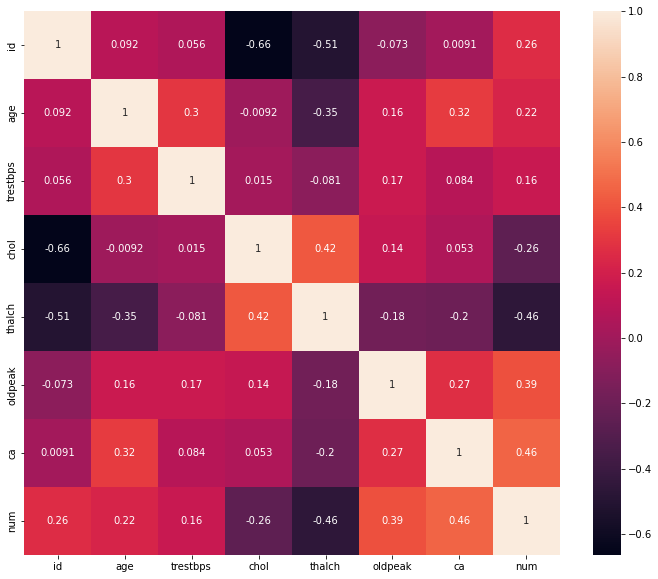

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [13]:
#data imbalance
xx = df['num'].value_counts()
xx

0    171
1     87
2     56
3     55
4     16
Name: num, dtype: int64

In [14]:
df.shape

(385, 15)

In [ ]:

df.replace({'sex':{'Male':0,'Female':1}},inplace=True)
df.replace({'cp':{'typical angina':1,'atypical angina':2,'non-anginal':3,'asymptomatic':4}},inplace=True)
df.replace({'restecg':{'normal':0,'st-t abnormality':1,'lv hypertrophy':2}},inplace= True)
df.replace({'slope':{'upsloping':1,'flat':2,'downsloping':3}},inplace = True)
df.replace({'thal':{'normal':3,'fixed defect':6,'fixed defect':7}},inplace = True)

In [ ]:
#feature selection
x = df.iloc[:,1:13].values
y = df.iloc[:,14].values